1.0 - Validação e informações gerais

In [98]:
import pandas as pd

In [99]:
dados = pd.read_csv('data/INMET_CO_GO_A035_ITUMBIARA_01-01-2023_A_31-12-2023.CSV', sep =';')

In [100]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   8760 non-null   object 
 1   Hora UTC                                               8760 non-null   object 
 2   PRECIPITAO TOTAL, HORARIO (mm)                         8383 non-null   object 
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  8384 non-null   object 
 4   PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        8384 non-null   object 
 5   PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       8384 non-null   object 
 6   RADIACAO GLOBAL (Kj/ms)                                8383 non-null   object 
 7   TEMPERATURA DO AR - BULBO SECO, HORARIA (C)            8386 non-null   object 
 8   TEMPERATURA DO PONTO DE ORVALHO (C)             

1.1 - Exploração de dados 

In [101]:
import plotly.express as px

In [102]:
px.histogram(dados, x='PRECIPITAO TOTAL, HORARIO (mm)', text_auto= True) 

In [103]:
px.histogram(dados, x='PRECIPITAO TOTAL, HORARIO (mm)', text_auto= True, color = 'Data') 

In [104]:
px.histogram(dados, 'PRECIPITAO TOTAL, HORARIO (mm)', text_auto= True, color = 'Data', barmode='group') 

In [105]:
dados['Data'] = pd.to_datetime(dados['Data'])

In [106]:
dados['Mês'] = dados['Data'].dt.month

In [107]:
px.histogram(dados, 'PRECIPITAO TOTAL, HORARIO (mm)', text_auto= True, color = 'Mês', barmode='group')


In [108]:
dados_mensais = dados.groupby('Mês')['PRECIPITAO TOTAL, HORARIO (mm)'].mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
dados.info()

In [ ]:
dados['PRECIPITAO TOTAL, HORARIO (mm)'] = dados['PRECIPITAO TOTAL, HORARIO (mm)'].astype(float)

In [ ]:
dados['PRECIPITAO TOTAL, HORARIO (mm)'] = dados['PRECIPITAO TOTAL, HORARIO (mm)'].str.replace(',', '.')

In [ ]:
dados['PRECIPITAO TOTAL, HORARIO (mm)'] = dados['PRECIPITAO TOTAL, HORARIO (mm)'].astype(float)

In [ ]:
dados_mensais_float = dados.groupby('Mês')['RECIPITAO TOTAL, HORARIO (mm)']

In [ ]:
dados.info()

In [ ]:
del dados_mensais

In [ ]:
dados_mensais = dados.groupby('Mês')['PRECIPITAO TOTAL, HORARIO (mm)']

In [ ]:
from numpy.ma.core import mean

dados_mensais_pivot = dados.pivot_table(values='PRECIPITAO TOTAL, HORARIO (mm)', index='Mês', aggfunc=mean)

1.2 - Tratar dados vazios

In [ ]:
dados_sem_nan = dados.dropna(subset=['PRECIPITAO TOTAL, HORARIO (mm)'])

In [ ]:
del dados_mensais_pivot

In [ ]:
dados_mensais_pivot = dados_sem_nan.pivot_table(values='PRECIPITAO TOTAL, HORARIO (mm)', index='Mês', aggfunc=mean)

In [ ]:
print(dados_mensais_pivot)

In [ ]:
dados_mensais_pivot.to_csv('generated/MEDIA_MENSAL_2023_ITUMBIARA.csv')

In [ ]:
dados.info()

2.1 - SKLEARN

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dados_mensais_pivot.info()

In [ ]:
dados_itb = pd.read_csv('generated/MEDIA_MENSAL_2023_ITUMBIARA.csv')

In [ ]:
del dados_itb

In [ ]:
dados_itb = pd.read_csv('generated/MEDIA_MENSAL_2023_ITUMBIARA.csv')

In [ ]:
dados_itb.info()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
df = pd.DataFrame(dados_itb)

In [ ]:
model.fit(df[["Mês"]], df["Precipitação (mm)"])

In [ ]:
print (df)

In [ ]:
del df 

In [ ]:
del dados_itb

In [ ]:
del df

In [117]:
df = pd.read_csv("generated/MEDIA_MENSAL_2023_ITUMBIARA.csv")

In [118]:
print(df)

    Mês  Precipitacao (mm)
0     1           0.654653
1     2           0.358029
2     3           0.334294
3     4           0.163662
4     5           0.001362
5     6           0.001667
6     7           0.011559
7     8           0.043338
8     9           0.035461
9    10           0.052924
10   11           0.054242
11   12           0.011127


In [119]:
X = df[['Mês']]
y = df['Precipitacao (mm)']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
modelo = LinearRegression()


In [122]:
modelo.fit(X_train, y_train)

LinearRegression()

In [123]:
previsoes = modelo.predict(X_test)

In [124]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, previsoes)
rmse = np.sqrt(mse)

In [125]:
print("Coeficiente de Regressão:", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)

Coeficiente de Regressão: -0.03401075900496597
Intercepto: 0.3183446041252269
Erro Quadrático Médio (MSE): 0.05160596256947119
Raiz do Erro Quadrático Médio (RMSE): 0.2271694578271278


In [126]:
import matplotlib.pyplot as plt

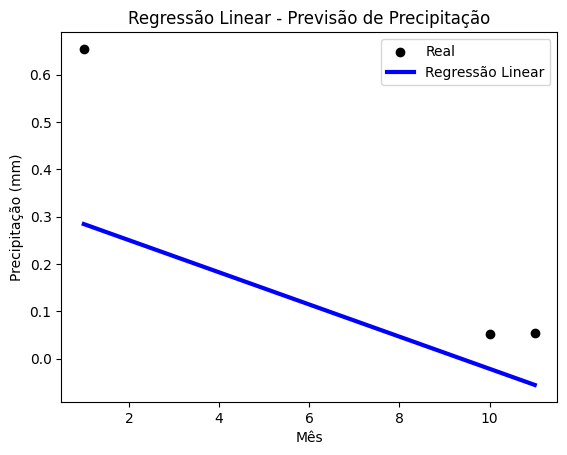

In [129]:
modelo.fit(X_train, y_train)

# Fazer previsões para o conjunto de teste
previsoes = modelo.predict(X_test)

# Plotar os dados reais
plt.scatter(X_test, y_test, color='black', label='Real')

# Plotar a linha de regressão
plt.plot(X_test, previsoes, color='blue', linewidth=3, label='Regressão Linear')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Precipitação (mm)')
plt.title('Regressão Linear - Previsão de Precipitação')

# Adicionar legenda
plt.legend()

# Salva e exibe o gráfico
plt.savefig('images/grafico_regressao_linear.png')
plt.show()